In [23]:

import pandas as pd
data = pd.read_csv("./credit_card.csv")
# change columns name

dic_columns = {
    "LIMIT_BAL": "limite",
    "CHECKING_ACCOUNT": "cuenta_corriente",
    "EDUCATION": "escolaridad",
    "MARRIAGE": "estado_civil", 
    "AGE": "edad", 
    "BILL_AMT": "valor_factura", 
    "PAY_AMT": "valor_pago", 
    "DEFAULT": "moroso"
}

tarjetas = data.rename(columns = dic_columns)
tarjetas.cuenta_corriente.unique()
dic_cuenta = {
    "Yes": "Si",
    "No": "No"
}
tarjetas.cuenta_corriente = tarjetas.cuenta_corriente.map(dic_cuenta)
tarjetas.escolaridad.unique()
dic_escolaridad = {
    "2.University": "2.Universidad",
    "3.Graduate School": "3.Pos.graduación",
    "1.High School": "1.Colegio"
}

tarjetas.escolaridad = tarjetas.escolaridad.map(dic_escolaridad)
tarjetas.head()

tarjetas.estado_civil.unique()
dic_estado_civil = {
    "Married": "Casado/a",
    "Single": "Soltero"
}
tarjetas.estado_civil = tarjetas.estado_civil.map(dic_estado_civil)
tarjetas.head()




,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso
0,6022,Si,2.Universidad,Casado/a,24,934.0122,0.0000,1
1,36132,Si,2.Universidad,Soltero,26,519.3975,0.0000,1
2,27099,Si,2.Universidad,Soltero,34,4223.5297,457.0698,0
3,15055,Si,2.Universidad,Casado/a,37,14522.9563,602.2000,0
4,150550,No,3.Pos.graduación,Soltero,29,124060.1253,16560.5000,0


## Análisis 1

c:\Users\antonio\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


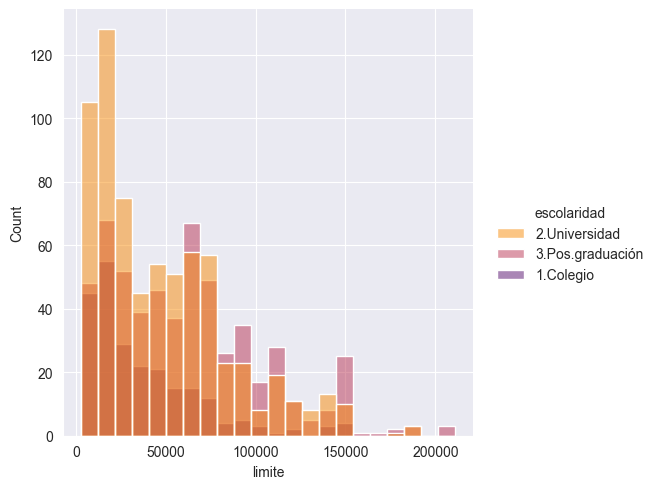

In [33]:
# visualization with seaborn

import seaborn as sns
# get shape
tarjetas.shape

sns.displot(data=tarjetas,x="limite",hue="escolaridad", palette="inferno_r")
sns.set_style("darkgrid")

## Análisis 2

c:\Users\antonio\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


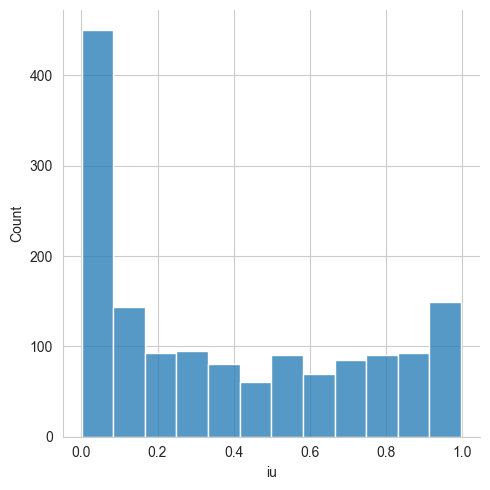

In [30]:
# usability
tarjetas["iu"] = tarjetas["valor_factura"] / tarjetas["limite"]
tarjetas.head()
sns.set_style("whitegrid")
sns.displot(data=tarjetas, x="iu")

# Hay un publico significativo que no usa todo el limite que tiene disponible

## Análisis de variables categóricas

<Axes: xlabel='cuenta_corriente', ylabel='count'>

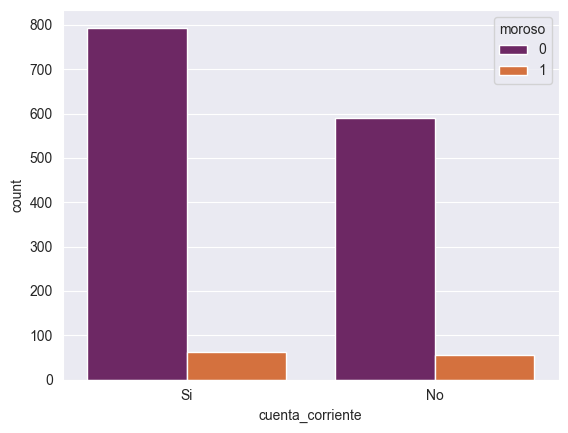

In [43]:
# compare people that have cuenta corriente
sns.countplot(x="cuenta_corriente", data=tarjetas, hue="moroso", palette="inferno")



c:\Users\antonio\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


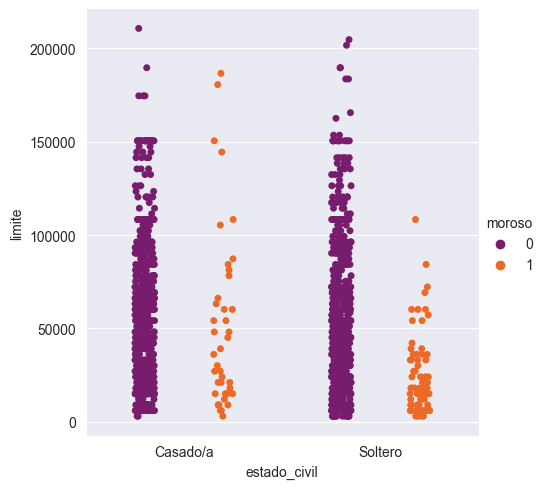

In [47]:
# personas que son casadas tienen un mayor limite?
sns.catplot(x="estado_civil", y="limite", data=tarjetas, hue="moroso", dodge=True, palette="inferno")



C:\Users\antonio\AppData\Local\Temp\ipykernel_3272\566198355.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x="escolaridad", y="iu", data=tarjetas, palette="inferno")
c:\Users\antonio\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\antonio\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 23.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='escolaridad', ylabel='iu'>

c:\Users\antonio\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 15.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\antonio\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 27.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


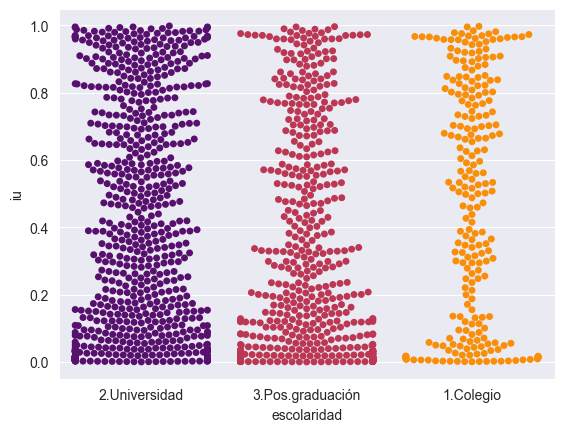

In [50]:
# relación de escolaridad con ui
sns.swarmplot(x="escolaridad", y="iu", data=tarjetas, palette="inferno")

<Axes: xlabel='escolaridad', ylabel='iu'>

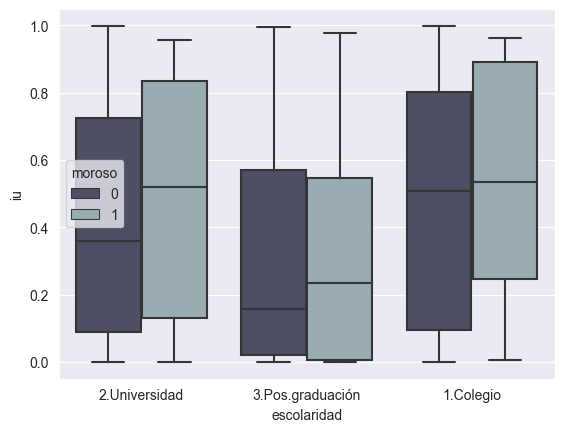

In [53]:
sns.boxplot(x="escolaridad", y="iu", data=tarjetas, hue="moroso", palette="bone")


<Axes: xlabel='escolaridad', ylabel='iu'>

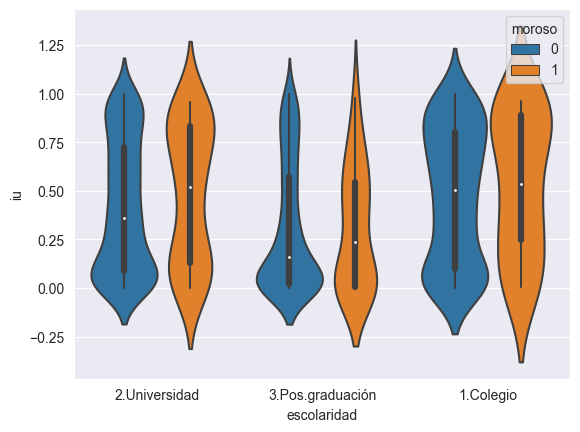

In [56]:
sns.violinplot(x="escolaridad", y="iu", data=tarjetas, hue="moroso")

<Axes: xlabel='rango_edad', ylabel='limite'>

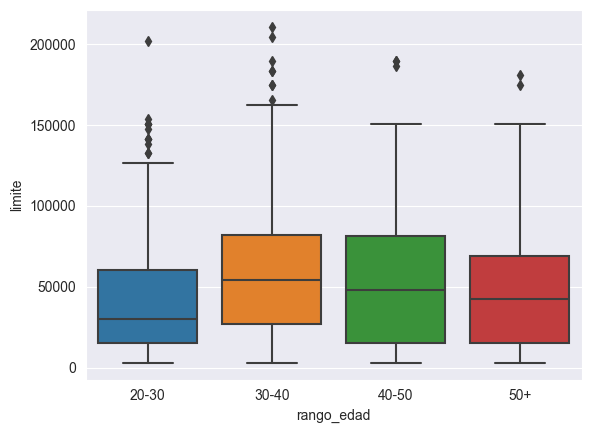

In [62]:

# comprueba la relación de la edad y el limite
tarjetas.edad.unique()
bins = [20, 30, 40, 50, 100]
nombres = ["20-30", "30-40", "40-50", "50+"]

tarjetas["rango_edad"] = pd.cut(tarjetas["edad"], bins, labels=nombres)

sns.boxplot(x="rango_edad", y="limite", data=tarjetas)

## Análisis de variables numéricas

c:\Users\antonio\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


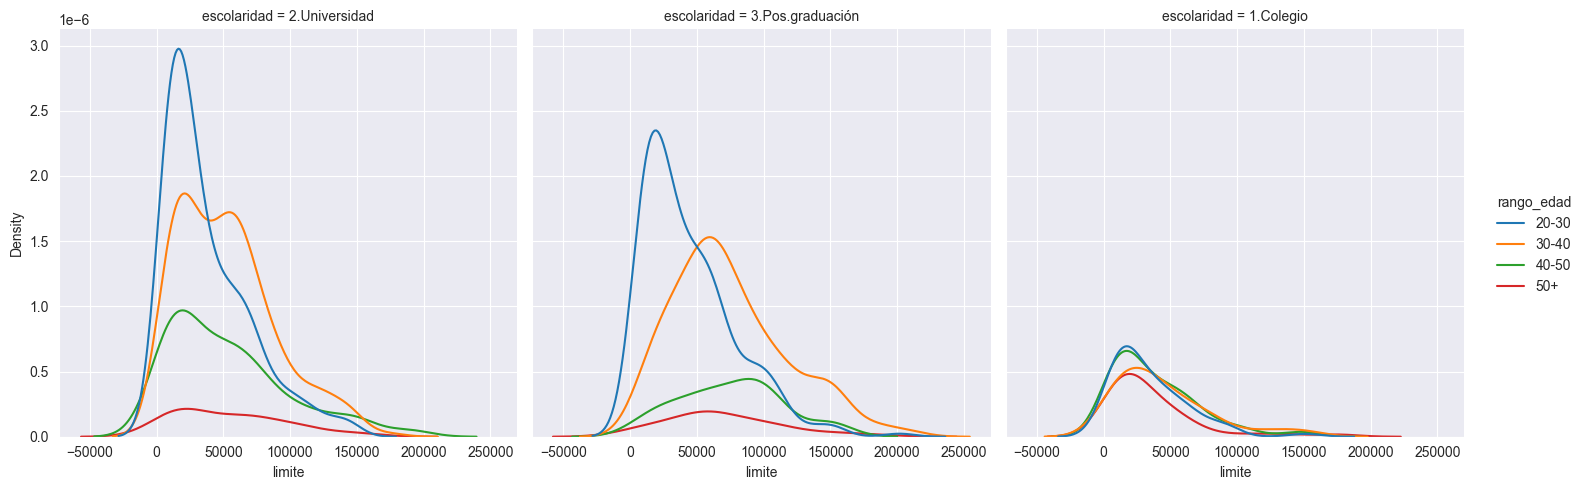

In [70]:
# relacion de limite y escolaridad
sns.displot(data=tarjetas, x="limite",col="escolaridad", kind="kde", hue="rango_edad")



<Axes: xlabel='iu', ylabel='valor_factura'>

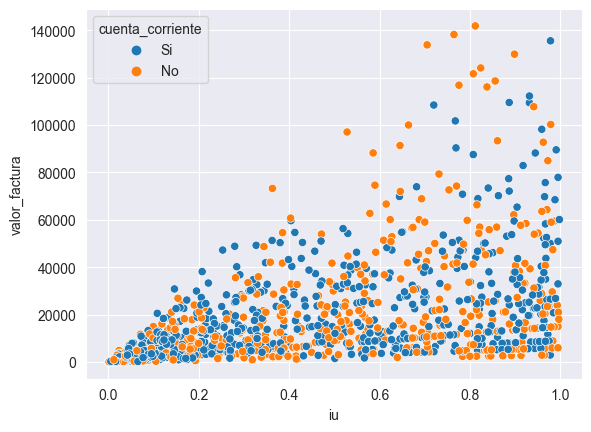

In [72]:
# Dispersion
# relación indice de uso y valor de factura
sns.scatterplot(x="iu", y="valor_factura", data=tarjetas, hue="cuenta_corriente")

c:\Users\antonio\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


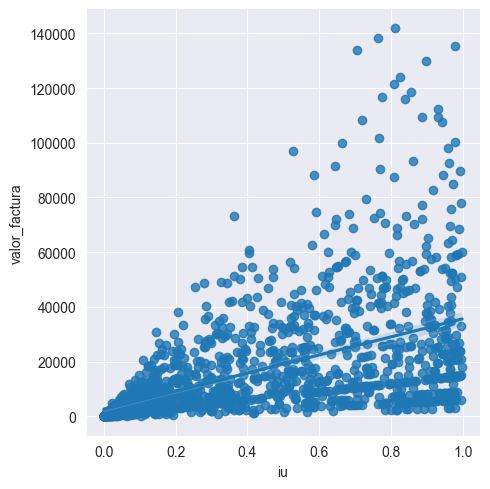

In [74]:
sns.lmplot(x="iu", y="valor_factura", data=tarjetas)

## Test de hipótesis

c:\Users\antonio\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


El p_value de nuestro test es 0.010391243081223555


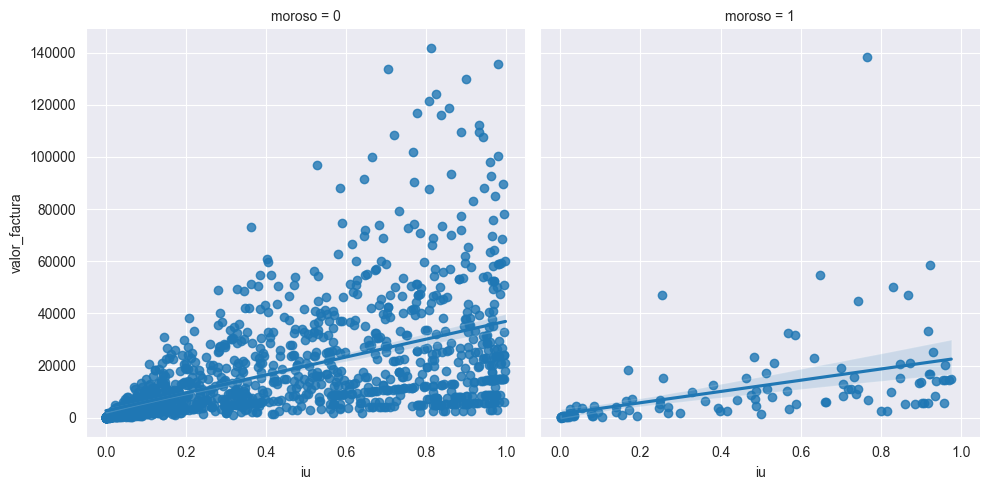

In [84]:
sns.lmplot(x="iu", y="valor_factura", data=tarjetas, col="moroso")
from scipy.stats import ranksums

moroso = tarjetas.query("moroso == 1").valor_factura
no_moroso = tarjetas.query("moroso == 0").valor_factura
resultado = ranksums(moroso, no_moroso)
print("El p_value de nuestro test es {}".format(resultado.pvalue))
# if result = -5, teoria aceptada
# la distribució de los grupos moroso y no moroso es la misma




# JointPlot

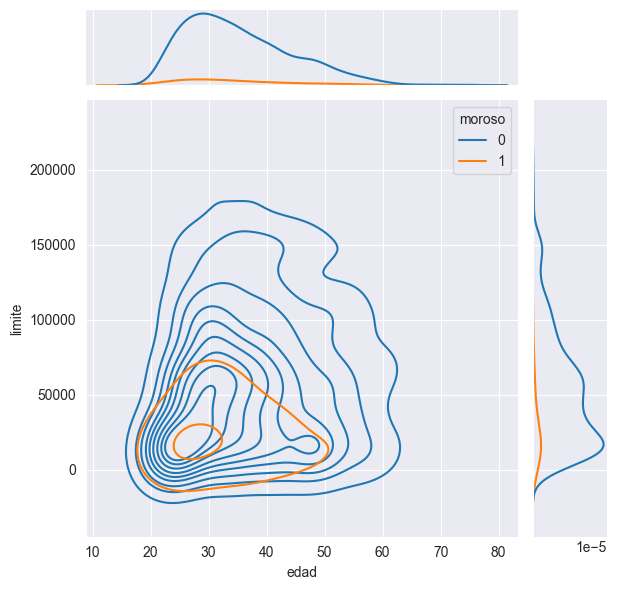

In [82]:

# ralcion de edad y limite
sns.jointplot(x="edad", y="limite", data=tarjetas, kind="kde", hue="moroso")



## Pairplot

In [83]:
# análisis rápido
tarjetas.describe()

,limite,edad,valor_factura,valor_pago,moroso,iu
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,51221.943333,35.212667,15459.869900,1984.869266,0.078000,0.388237
std,39424.407462,9.274955,20722.582831,5296.771686,0.268261,0.341923
min,3011.000000,21.000000,27.701200,0.000000,0.000000,0.000188
25%,18066.000000,28.000000,2035.586550,407.011925,0.000000,0.049209
50%,42154.000000,33.500000,7701.385250,759.374200,0.000000,0.308976
75%,72264.000000,41.000000,20671.568850,1705.279850,0.000000,0.704090
max,210770.000000,75.000000,141792.506500,97022.850800,1.000000,0.998010


c:\Users\antonio\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


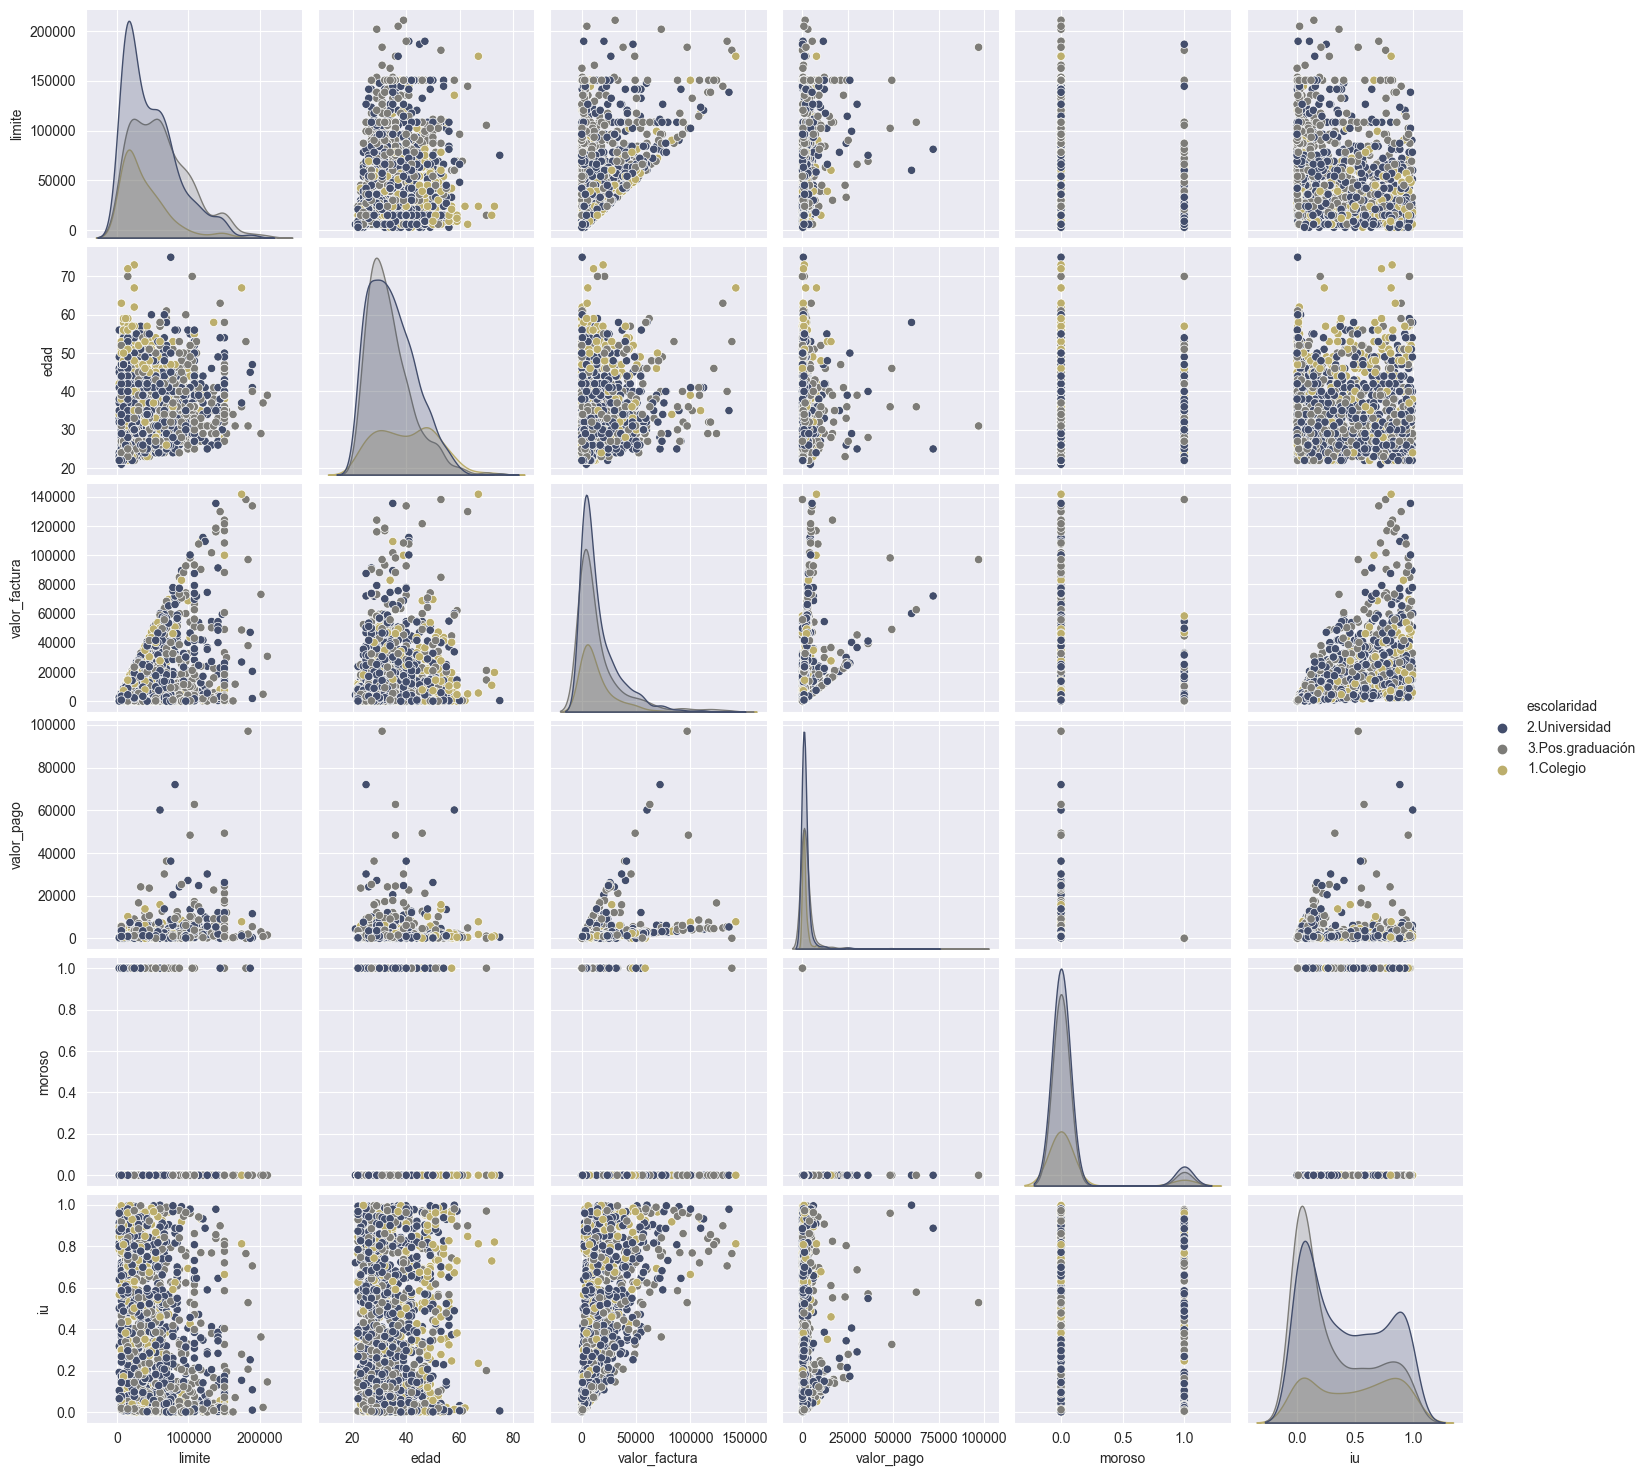

In [86]:
sns.pairplot(data=tarjetas, hue="escolaridad", palette="cividis")